# Pandas Time Series Analysis Part 1: DatetimeIndex and Resample

## Inspired by Dhruv Patel's Code Basics YouTube Channel

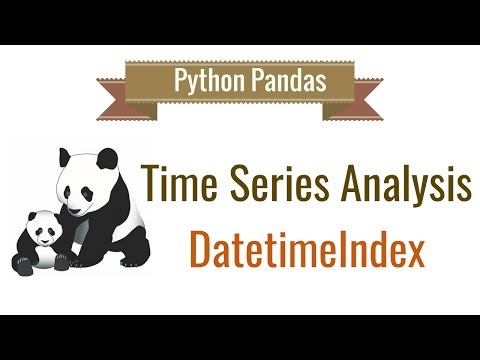

In [1]:
from IPython.display import YouTubeVideo

# Youtube
YouTubeVideo('r0s4slGHwzE')

In [64]:
import pandas as pd 

In [4]:
# Reading the GE Stock Price in a Data Frame
ge_stock_price_df = pd.read_csv('GE_Stock_Price.csv')

In [5]:
ge_stock_price_df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/28/2015,29.557692,29.807692,29.432692,29.711538,26.475573,27620000
1,12/29/2015,29.817308,30.269230,29.807692,30.076923,26.801161,34736400
2,12/30/2015,30.076923,30.230770,29.817308,29.855770,26.604092,30292800
3,12/31/2015,29.673077,30.278847,29.605770,29.951923,26.689772,54400000
4,1/4/2016,29.375000,29.576923,29.086538,29.528847,26.312775,65396700


In [6]:
# By default the Date column is read as string data type
type(ge_stock_price_df['Date'])

pandas.core.series.Series

In [7]:
type(ge_stock_price_df['Date'][0])

str

In [9]:
# To parse the Date column as datetime the parameter parse_dates must be used
ge_stock_price_df = pd.read_csv('GE_Stock_Price.csv', parse_dates=['Date'])

In [10]:
# Now the Date column is parsed as Date
type(ge_stock_price_df['Date'])

pandas.core.series.Series

In [11]:
type(ge_stock_price_df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
#The index of the data frame is the integer range
ge_stock_price_df.index

RangeIndex(start=0, stop=1008, step=1)

In [13]:
# Making the date column as the index
ge_stock_price_df = pd.read_csv('GE_Stock_Price.csv', parse_dates=['Date'], index_col='Date')

In [14]:
ge_stock_price_df.index 

DatetimeIndex(['2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31',
               '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-26', '2019-12-27'],
              dtype='datetime64[ns]', name='Date', length=1008, freq=None)

## The benefits of have the Date column as the index

- We can retrieve the stock prices for the entire month of January 2016

In [19]:
ge_stock_price_df['2016-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,29.375000,29.576923,29.086538,29.528847,26.312775,65396700
2016-01-05,29.500000,29.653847,29.278847,29.557692,26.338476,57383200
2016-01-06,29.105770,29.538462,28.894230,29.086538,25.918644,65158800
2016-01-07,28.509615,28.807692,27.740385,27.855770,24.821918,95958000
2016-01-08,28.076923,28.173077,27.250000,27.355770,24.376379,77475900
2016-01-11,27.442308,28.769230,27.163462,27.480770,24.487761,60770700
2016-01-12,27.653847,27.769230,27.250000,27.538462,24.539173,49590100
2016-01-13,27.798077,27.942308,27.115385,27.153847,24.196444,57946400
2016-01-14,27.221153,28.125000,27.201923,27.942308,24.899038,67846300


- We can retrieve the average stock prices for the entire month of January 2017

In [21]:
ge_stock_price_df['2017-01'].Close.mean() 

29.707692399999996

- We can retrieve the stock prices for a range of dates

In [22]:
ge_stock_price_df['2018-01-01':'2018-01-15'] 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,16.903847,17.298077,16.855770,17.288462,16.726093,80673100
2018-01-03,17.596153,17.634615,17.336538,17.451923,16.884241,84731100
2018-01-04,17.673077,17.903847,17.596153,17.817308,17.237741,85856600
2018-01-05,18.134615,18.144230,17.788462,17.826923,17.247042,83074800
2018-01-08,17.951923,17.980770,17.403847,17.576923,17.005173,85381500
2018-01-09,17.625000,17.942308,17.413462,17.846153,17.265648,69056200
2018-01-10,17.875000,18.326923,17.865385,18.201923,17.609840,85615000
2018-01-11,18.490385,18.644230,18.269230,18.288462,17.693567,103714600
2018-01-12,18.384615,18.413462,17.980770,18.038462,17.451700,90559700


- We can retrieve the stock price for any date

In [50]:
ge_stock_price_df.loc["2018-01-02",:]

Open         1.690385e+01
High         1.729808e+01
Low          1.685577e+01
Close        1.728846e+01
Adj Close    1.672609e+01
Volume       8.067310e+07
Name: 2018-01-02 00:00:00, dtype: float64

# Resampling of Time Series Data

- To get the average monthly stock prices

In [60]:
ge_stock_price_df.resample('M').Close.mean() 

Date
2015-12-31    29.899038
2016-01-31    27.687753
2016-02-29    27.662981
2016-03-31    29.499126
2016-04-30    29.774268
2016-05-31    28.847070
2016-06-30    29.191433
2016-07-31    30.821634
2016-08-31    30.047241
2016-09-30    28.963828
2016-10-31    27.914835
2016-11-30    29.071429
2016-12-31    30.445971
2017-01-31    29.707692
2017-02-28    28.812247
2017-03-31    28.649666
2017-04-30    28.582996
2017-05-31    27.209353
2017-06-30    26.857518
2017-07-31    25.311058
2017-08-31    24.030518
2017-09-30    23.462019
2017-10-31    22.034091
2017-11-30    18.229395
2017-12-31    16.963462
2018-01-31    16.737637
2018-02-28    14.289980
2018-03-31    13.513736
2018-04-30    13.137820
2018-05-31    13.957605
2018-06-30    13.025641
2018-07-31    13.022894
2018-08-31    12.242475
2018-09-30    11.794028
2018-10-31    11.762960
2018-11-30     7.995879
2018-12-31     6.957996
2019-01-31     8.482143
2019-02-28     9.936093
2019-03-31     9.966667
2019-04-30     9.505714
2019-05-31 

In [65]:
%matplotlib inline 

Date
2016-01-03    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-10    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-17    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-24    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
                              ...                 
2019-12-01    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-08    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-15    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-22    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-29    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: Close, Length: 209, dtype: object

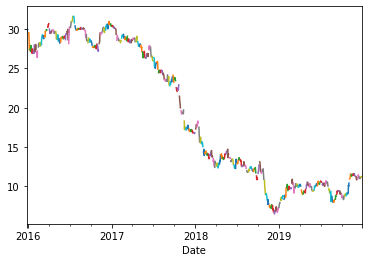

In [67]:
ge_stock_price_df.resample('W').Close.plot()  # Chart showing the GE Weekly Closing Stock prices 

### Visit https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling to see all the resampling options

Date
2019-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: Close, dtype: object

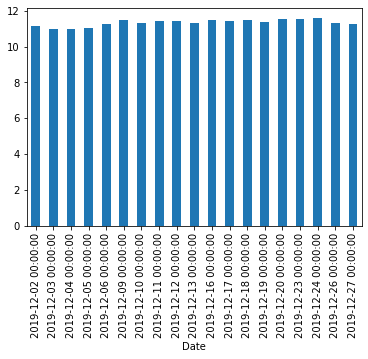

In [70]:
ge_stock_price_df['2019'].resample('M').Close.plot(kind = 'bar')  # Chart showing the GE Monthly Closing Stock prices 

Date
2019-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2019-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-04-30    AxesSubplot(0.125,0.2;0.775x0.68)
2019-05-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2019-07-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2019-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-11-30    AxesSubplot(0.125,0.2;0.775x0.68)
2019-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: M, Name: Close, dtype: object

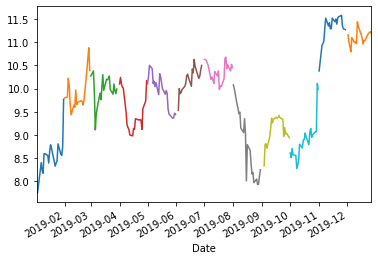

In [71]:
ge_stock_price_df['2019'].resample('M').Close.plot(kind = 'line')  # Chart showing the GE Monthly Closing Stock prices 